** **
**Competição Machine Learning Kaggle : Spaceship Titanic**

**Lucas Roberto de Oliveira Lopes**

**ICMC/ USP - São Carlos, SP**

**Competição realizada em março - 2022**


** **

# **Detalhes da Competição**

**Spaceship Titanic**


Bem-vindo ao ano de 2912, onde suas habilidades em ciência de dados são necessárias para resolver um mistério cósmico. Recebemos uma transmissão de quatro anos-luz de distância e as coisas não parecem boas.

A nave Spaceship Titanic foi um transatlântico interestelar de passageiros lançado há um mês. Com quase 13.000 passageiros a bordo, a nave partiu em sua viagem inaugural transportando emigrantes do nosso sistema solar para três exoplanetas recém-habitáveis ​​orbitando estrelas próximas.

Enquanto contornava Alpha Centauri a caminho de seu primeiro destino - o tórrido 55 Cancri E - a desavisada nave Titanic colidiu com uma anomalia do espaço-tempo escondida dentro de uma nuvem de poeira. Infelizmente, ele encontrou um destino semelhante ao seu homônimo de 1000 anos antes. Embora a nave tenha permanecido intacta, quase metade dos passageiros foi transportada para uma dimensão alternativa!





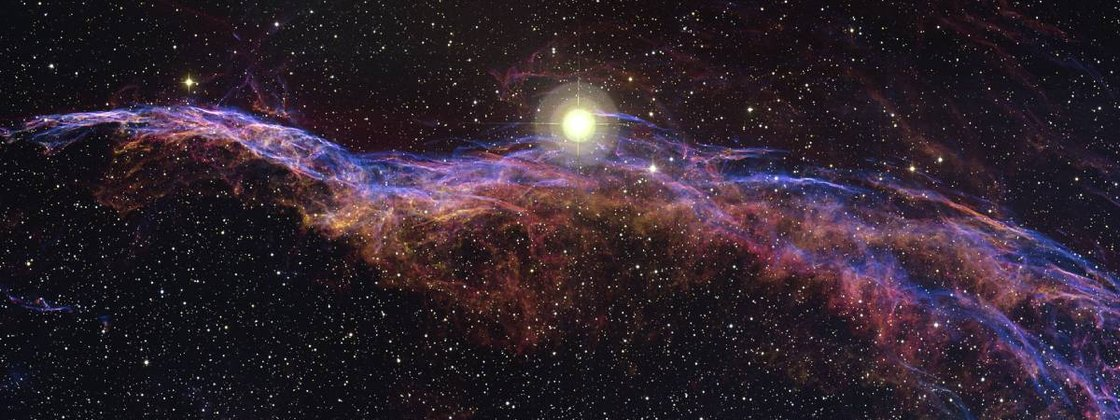

Para ajudar as equipes de resgate e recuperar os passageiros perdidos, você é desafiado a prever quais passageiros foram transportados pela anomalia usando registros recuperados do sistema de computador danificado da nave espacial.

Ajude a salvá-los e mudar a história!

Mais detalhes sobre a competição pode ser encontrado em [Kaggle Competição](https://www.kaggle.com/c/spaceship-titanic)

#**Descrição dos Dados**

** **
**Treino.csv** : Registros pessoais de cerca de dois terços (~8700) dos passageiros, para serem usados ​​como dados de treinamento
*   **PassengerId**: Um ID exclusivo para cada passageiro. Cada Id assume o formato gggg_pp, onde gggg indica um grupo com o qual o passageiro está viajando e pp é seu número dentro do grupo. As pessoas em um grupo geralmente são membros da família, mas nem sempre.

*   **HomePlanet**: O planeta de onde o passageiro partiu, normalmente seu planeta de residência permanente.

*   **CryoSleep**: Indica se o passageiro optou por ser colocado em animação suspensa durante a viagem. Os passageiros em sono criogênico estão confinados em suas cabines.

*   **Cabin**: O número da cabine onde o passageiro está hospedado. Assume o formato deck/num/side, onde o lado pode ser P para 'Port' ou S para 'Starboard'.

*   **Destination**: O planeta para o qual o passageiro irá desembarcar.

*   **Age**: A idade do passageiro.

*   **VIP**: Se o passageiro pagou pelo serviço VIP especial durante a viagem.

*   **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: Valor que o passageiro gastou em cada uma das muitas comodidades de luxo da Nave Espacial Titanic.

*   **Name**: O primeiro e ultimo nome do passageiro

*   **Transported**: Se o passageiro foi transportado para outra dimensão. Este é o alvo, a coluna que você está tentando prever.

**Teste.csv** : Registros pessoais para o terço restante (~4300) dos passageiros, para serem usados ​​como dados de teste. Sua tarefa é prever o valor de Transportado para os passageiros neste conjunto.

**Sample Submission** : Um arquivo de envio no formato correto.
PassengerId - Id para cada passageiro no conjunto de teste.
Transportado - O alvo. Para cada passageiro, preveja True ou False.

** **


#**Dados**

In [1]:
#Importando as principais bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Leitura dos dados
treino = pd.read_csv("/content/train.csv")
teste = pd.read_csv('/content/test.csv')
submission = pd.read_csv("/content/sample_submission.csv")

In [3]:
treino.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#**Análise de Dimensão**

In [ ]:
print(f'Esse dataset possui {treino.shape[0]} linhas e {treino.shape[1]} colunas nos dados de treino')
print(f'Esse dataset possui {teste.shape[0]} linhas e {teste.shape[1]} colunas nos dados de teste')

Esse dataset possui 8693 linhas e 14 colunas nos dados de treino
Esse dataset possui 4277 linhas e 13 colunas nos dados de teste


In [ ]:
#Descrição das features numericas
treino.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Podemos perceber que as features numéricas possuem muitos outliers e os dados estão muito dispersos, provavelmente será necessário uma normalização dos dados

In [ ]:
#Descrição das features categóricas
treino.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


#**Tratamento dos Dados**

In [ ]:
#Verificando dados faltantes
treino.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [ ]:
teste.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64


Para as features categóricas, vamos preencher com o valor mais comum

In [3]:
categoricas = ['Destination','CryoSleep','HomePlanet','VIP']

for col in categoricas:
  comum = treino[col].value_counts().index[0]
  treino[col].fillna(comum,inplace = True)
  teste[col].fillna(comum,inplace = True)


Para as Features númericas:

Podemos notar que as pessoas que possuem a feature ("VIP" == True), tendem a gastar mais do que as que possuem ("VIP" == False). Além disso temos muitos outliers nessas features e portanto vamos preencher os dados faltantes com a mediana de cada coluna, dando um valor de mediana pra quem possui VIP e outro valor pra quem não possui VIP 

In [4]:
gastos = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in gastos:
  mediana = treino.groupby("VIP")[col].transform('median')
  treino[col].fillna(mediana,inplace = True)
  teste[col].fillna(mediana,inplace = True)

Vamos preencher os dados faltantes da feature "Age" com a mediana das idades

In [5]:
mediana = treino['Age'].median()
treino['Age'].fillna(mediana,inplace = True)
teste['Age'].fillna(mediana,inplace = True)

Para a Feature Cabin, vamos interpolar os dados faltantes

In [6]:
treino['Cabin'].interpolate(method ='pad',inplace = True)
teste['Cabin'].interpolate(method ='pad',inplace = True)

#**Análise Exploratória**

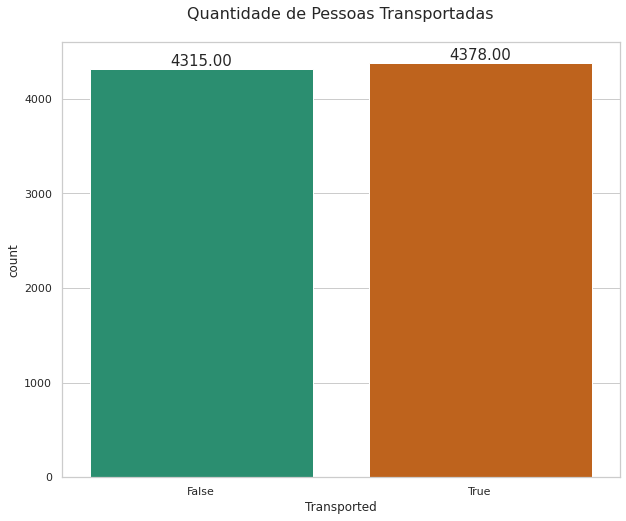

In [ ]:
plt.figure(figsize = (10,8))
sns.set_theme(style = "whitegrid")

plots = sns.countplot(data = treino,palette = 'Dark2',x = "Transported")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords = 'offset points')

plt.title("Quantidade de Pessoas Transportadas\n",size = 16)
plt.show();



*   Nosso Target está bem balanceado



Vamos verificar a média de pessoas que foram transportadas de acordo com cada feature

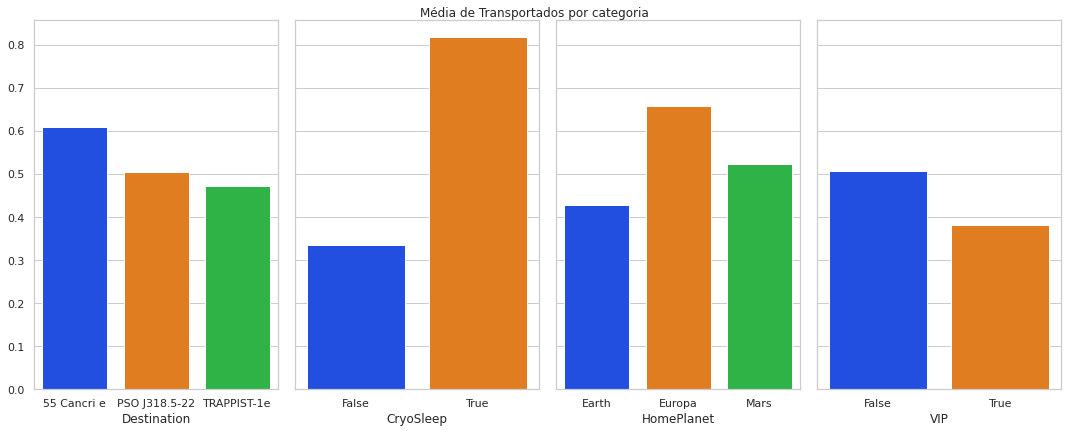

In [ ]:
#Plotando as features categóricas
sns.set_theme(style = "whitegrid")

fig, axes = plt.subplots(1,4,figsize=(15,6),sharey = True)
fig.suptitle("Média de Transportados por categoria\n",size = 12,y = 1)

for num,col in enumerate(categoricas):
  sns.barplot(ax = axes[num], x = treino.groupby(by = col)['Transported'].mean().index,
              y = treino.groupby(by = col)['Transported'].mean().values, palette = 'bright')

plt.tight_layout()
plt.show()


**Observações:**




*  Podemos notar que as pessoas que possuem a feature "CryoSleep" igual a True, mais de 80% delas foram transportadas e portanto precisamos fazer um tipo de encoding para que nosso modelo entenda isso.

*   Cerca de 65% das pessoas que moram em Europa foram transportadas.
*   61% das pessoas que tinham como destino 55 Cancri e foram transportadas.










Vamos verificar a correlação de cada feature

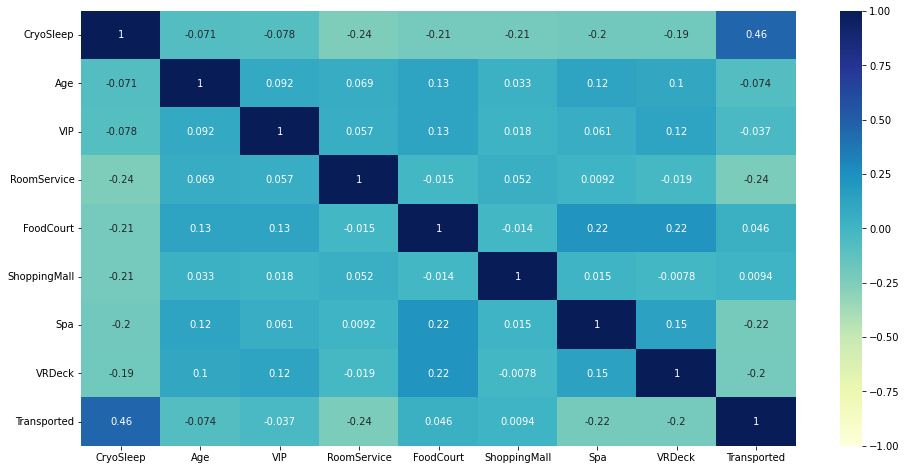

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(treino.corr(),cmap="YlGnBu",vmin=-1, vmax=1,center= 0,annot = True)
plt.show()



*   Aparentente as features não possuem uma correlação forte 



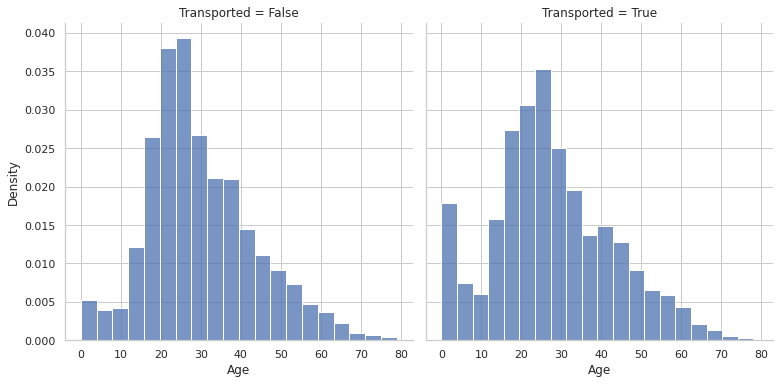

In [ ]:
#Verificando a idade de quem foi transportado
g = sns.FacetGrid(treino,col = 'Transported',height = 5.5)
g.map(sns.histplot,"Age",bins = 20,stat = 'density')
plt.show()

#**FEATURE ENGINEERING**

Primeiro vamos verificar se cada passageiro estava sozinho, extraindo da feature PassengerID os 4 primeiros digitos, e então criar duas novas features: "IsAlone" que diz se o passageiro estava sozinho e "FamilySize" para quantidade de pessoas juntas.

In [7]:
#Criando uma feature que verifica se a pessoa estava sozinha ou acompanhada
treino['FamilySize'] = treino['PassengerId'].str.strip().str[:4]
treino['isAlone'] = treino.groupby(by = 'FamilySize')['FamilySize'].transform('count') == 1
treino['FamilySize'] = treino.groupby(by = 'FamilySize')['FamilySize'].transform('count')

teste['FamilySize'] = teste['PassengerId'].str.strip().str[:4]
teste['isAlone'] = teste.groupby(by = 'FamilySize')['FamilySize'].transform('count') == 1
teste['FamilySize'] = teste.groupby(by = 'FamilySize')['FamilySize'].transform('count')

#Eliminando as Features que não vamos utilizar mais
treino = treino.drop(['Name','PassengerId'],axis = 1)
teste = teste.drop(['Name','PassengerId'],axis = 1)

treino.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FamilySize,isAlone
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,True
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,True


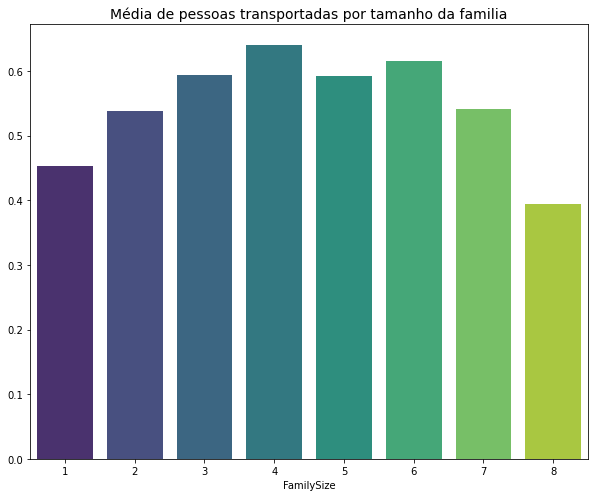

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = treino.groupby(by = 'FamilySize')['Transported'].mean().index, y = treino.groupby(by = 'FamilySize')['Transported'].mean().values,palette ='viridis')
plt.title("Média de pessoas transportadas por tamanho da familia",size = 14)
plt.show()



*   Passageiros que viajavam em grupo de 4 pessoas, foram em média mais transportados do que os outros.




Vamos criar outras 3 novas Features (Deck, num, side), extraindo da Feature Cabin

In [8]:
treino['Deck'] = treino['Cabin'].str.strip().str[0]
teste['Deck'] = teste['Cabin'].str.strip().str[0]

treino['Num'] = treino['Cabin'].str.strip().str[2:-2]
teste['Num'] = teste['Cabin'].str.strip().str[2:-2]

treino['Side'] = treino['Cabin'].str.strip().str[-1]
teste['Side'] = teste['Cabin'].str.strip().str[-1]

#Eliminando a Feature Cabin que não vamos usar 
treino.drop('Cabin',axis= 1 , inplace = True)
teste.drop('Cabin',axis= 1 , inplace = True)

Label Encoding 

In [9]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder_columns = ['CryoSleep','isAlone','Side','VIP','HomePlanet','Destination','Deck']

for column in label_encoder_columns:
    # cria um encoder
    label_encoder = LabelEncoder()

    # cria um dicionario para o encoder
    label_encoder.fit(treino[column])

    # aplica as transformações nos datasets
    treino[column] = label_encoder.transform(treino[column])
    teste[column] = label_encoder.transform(teste[column])

Vamos dividir a idade em 5 intervalos e verificar a média de transportados

In [10]:
treino['AgeBand'] = pd.cut(treino['Age'], 5)
treino[['AgeBand','Transported']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending = True)

,AgeBand,Transported
0,"(-0.079, 15.8]",0.648387
1,"(15.8, 31.6]",0.475495
2,"(31.6, 47.4]",0.485510
3,"(47.4, 63.2]",0.486747
4,"(63.2, 79.0]",0.463235


In [11]:
combine = [treino,teste]

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

treino.drop('AgeBand',axis = 1,inplace = True)

Vamos criar features com algumas estatisticas sobre as features de gastos

In [12]:
def estatisticas(df, features):
    df['Média Gastos'] = df[features].mean(axis=1)
    df['Min Gastos'] = df[features].min(axis=1)
    df['std Gastos'] = df[features].std(axis=1)
    
    return df   

gastos = ['VRDeck', 'Spa', 'RoomService','FoodCourt','ShoppingMall']
treino = estatisticas(treino, gastos)
teste = estatisticas(teste, gastos)

In [39]:
treino.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Side,Média Gastos,Min Gastos,std Gastos,TotalSpend,PctRoomService,PctFoodCourt,PctShoppingMall,PctSpa,PctVRDeck
0,1,0,2,2.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,2,1.0,0,109.0,9.0,25.0,549.0,44.0,...,1,147.2,9.0,227.807375,736.0,0.148098,0.012228,0.033967,0.745924,0.059783
2,1,0,2,3.0,1,43.0,3576.0,0.0,6715.0,49.0,...,1,2076.6,0.0,3013.383198,10383.0,0.004141,0.344409,0.000000,0.646730,0.004719
3,1,0,2,2.0,0,0.0,1283.0,371.0,3329.0,193.0,...,1,1035.2,0.0,1373.410427,5176.0,0.000000,0.247875,0.071677,0.643161,0.037287
4,0,0,2,0.0,0,303.0,70.0,151.0,565.0,2.0,...,1,218.2,2.0,223.988169,1091.0,0.277727,0.064161,0.138405,0.517874,0.001833


#**Modelagem com PyCaret**

In [ ]:
!pip install pycaret[full]

In [13]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [40]:
#Criando o setup 
from pycaret.classification import *
clf1 = setup(data = treino, target = 'Transported', n_jobs=-1,
             train_size=0.99,fold_strategy='stratifiedkfold',
             normalize = True, transformation = True, normalize_method = "robust",
             fold=5, fold_shuffle=True,
             remove_multicollinearity = True,ignore_low_variance=True,
             silent = True)

#Retorna o melhor modelo
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8134,0.9062,0.8276,0.8072,0.8172,0.6267,0.6271,6.876
lightgbm,Light Gradient Boosting Machine,0.8098,0.9023,0.8195,0.8066,0.8128,0.6195,0.6199,0.394
xgboost,Extreme Gradient Boosting,0.8037,0.8973,0.7981,0.8099,0.8038,0.6075,0.6078,4.002
gbc,Gradient Boosting Classifier,0.8030,0.8955,0.8377,0.7861,0.8108,0.6058,0.6076,1.222
rf,Random Forest Classifier,0.7934,0.8714,0.7552,0.8207,0.7864,0.5870,0.5892,1.234
ada,Ada Boost Classifier,0.7836,0.8700,0.8352,0.7596,0.7954,0.5669,0.5702,0.450
et,Extra Trees Classifier,0.7821,0.8337,0.7264,0.8210,0.7706,0.5646,0.5687,1.232
lr,Logistic Regression,0.7669,0.8444,0.7720,0.7671,0.7694,0.5338,0.5340,1.826
ridge,Ridge Classifier,0.7669,0.0000,0.7674,0.7695,0.7683,0.5338,0.5340,0.090
lda,Linear Discriminant Analysis,0.7668,0.8443,0.7672,0.7695,0.7682,0.5336,0.5338,0.088


In [42]:
#Criando o modelo CatBoost
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8217,0.9153,0.8272,0.8206,0.8239,0.6434,0.6434
1,0.8152,0.9078,0.8410,0.8022,0.8211,0.6303,0.6310
2,0.8071,0.8992,0.8018,0.8131,0.8074,0.6142,0.6143
3,0.8042,0.8937,0.8212,0.7964,0.8086,0.6083,0.6086
4,0.8187,0.9151,0.8466,0.8039,0.8247,0.6373,0.6382
Mean,0.8134,0.9062,0.8276,0.8072,0.8172,0.6267,0.6271
SD,0.0067,0.0086,0.0158,0.0085,0.0076,0.0134,0.0135


In [16]:
#Criando o modelo Lightgbm
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.9114,0.8166,0.8204,0.8185,0.6353,0.6353
1,0.7937,0.8887,0.8028,0.7909,0.7968,0.5874,0.5874
2,0.8263,0.9069,0.8245,0.8293,0.8269,0.6525,0.6525
3,0.7972,0.8926,0.8152,0.7888,0.8018,0.5943,0.5947
4,0.8175,0.9117,0.8164,0.8202,0.8183,0.6351,0.6351
Mean,0.8105,0.9023,0.8151,0.8099,0.8125,0.6209,0.6210
SD,0.0127,0.0097,0.0070,0.0167,0.0113,0.0255,0.0254


In [17]:
#Criando um modelo XGBoost
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8223,0.9107,0.8189,0.8265,0.8227,0.6446,0.6446
1,0.7891,0.8873,0.7924,0.7897,0.7910,0.5781,0.5781
2,0.8205,0.9042,0.8014,0.8351,0.8179,0.6410,0.6415
3,0.8001,0.8916,0.8072,0.7979,0.8025,0.6002,0.6002
4,0.8053,0.9067,0.8014,0.8098,0.8056,0.6107,0.6107
Mean,0.8075,0.9001,0.8042,0.8118,0.8079,0.6149,0.6150
SD,0.0125,0.0090,0.0087,0.0170,0.0113,0.0251,0.0252


Criando um blend com os 3 melhores modelos

CatBoosting, XGboost e LightGBM

In [30]:
blend_soft = blend_models(estimator_list = [lightgbm,catboost,xgboost], optimize = 'Accuracy', method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8211,0.9173,0.8189,0.8246,0.8218,0.6423,0.6423
1,0.7966,0.8939,0.8028,0.7954,0.7991,0.5932,0.5932
2,0.8257,0.9112,0.8164,0.8337,0.8250,0.6514,0.6515
3,0.8048,0.8965,0.8210,0.7971,0.8089,0.6094,0.6097
4,0.8129,0.9139,0.8176,0.8119,0.8147,0.6258,0.6258
Mean,0.8122,0.9066,0.8153,0.8126,0.8139,0.6244,0.6245
SD,0.0106,0.0095,0.0065,0.0150,0.0093,0.0212,0.0212


Vamos calibrar o modelo para melhorar a sua acurácia

In [31]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8171,0.9166,0.8270,0.8129,0.8199,0.6341,0.6342
1,0.8001,0.8946,0.8155,0.7935,0.8043,0.6001,0.6004
2,0.8263,0.9112,0.8303,0.8255,0.8279,0.6525,0.6525
3,0.8036,0.8962,0.8256,0.7927,0.8088,0.6071,0.6076
4,0.8158,0.9135,0.8233,0.8130,0.8181,0.6316,0.6316
Mean,0.8126,0.9064,0.8243,0.8075,0.8158,0.6251,0.6253
SD,0.0095,0.0092,0.0050,0.0126,0.0083,0.0191,0.0189


In [46]:
#Enviando as predissões
final_dt = finalize_model(cali_model)
unseen_predictions = predict_model(final_dt, data = teste)
submission['Transported'] = unseen_predictions.Label
submission.to_csv('submission24.csv', index = False)

#**Conclusão e Resultados**

Durante a análise de dados conseguimos notar muitos outliers, principalmente com as features relacionadas ao gasto de cada passageiro, para isso foi necessario fazer uma transformação com o PyCaret para melhorar a acurácia do modelo. Além disso, para tratar os dados faltantes foi necessário uma boa análise individual de cada feature.

Enviando as previsões para o Leaderboard conseguimos uma acurácia de **0.80710** e conseguimos ficar entre os **10% melhores colocados da competição**

Para cada submissão foi tentada uma abordagem diferente. Esse projeto apresenta de forma resumida as técnicas empregadas ao longo de toda competição. 


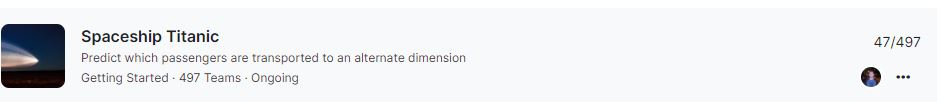